## Tensor concat

In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
# 将两个tensor合并
a= tf.ones([4,35,8]) #表示有4个班级，每个班级有35个学生，每个学生上8门课
b= tf.ones([2,35,8])
# print(a)
# print(b)
c=tf.concat([a,b],axis=0)

In [3]:
# 另外一种情景：如果先取出4个班级中，每个班级的前33个学生的成绩，再取出后3个，然后合并
a=tf.ones([4,33,8])
b=tf.ones([4,2,8])
c=tf.concat([a,b],axis=1)
print(c.shape)

(4, 35, 8)


In [4]:
### 注意：对于concat的操作，要求在除去合并维度的其他维上的维度都相等,但是不会增加维度，只是在原有的数量上有所增加

## Tensor Stack

In [5]:
a=tf.ones([4,35,8])
b=tf.ones([4,35,8])

In [6]:
c=tf.stack([a,b],axis=0) 
print(c.shape) #增加一个axis可以用来区别，数据是来自哪个矩阵

(2, 4, 35, 8)


In [7]:
### 注意对于stack来说，要求在所有维度上的维度都相等，因为不是单纯的合并，可以理解为创建一个一摸一样的空间放一摸一样大小的东西

## Tensor Unstack

In [8]:
## tensor unstack将tensor里的数据在某一个轴上，逐一分离

In [9]:
c=tf.ones([2,4,35,8])
a,b=tf.unstack(c,axis=0)
print(a.shape,b.shape)
# 如果在axis=3的轴上unstack，就会得到8个(2,4,35)大小的tensor
res=tf.unstack(c,axis=3) #其中res是一个list

(4, 35, 8) (4, 35, 8)


## Tensor Split

In [10]:
res=tf.split(c,axis=3,num_or_size_splits=2) #表示将axis=3上的数据，均分成两份
print(len(res)) #表示list中就会用两个元素，而且这两个元素的大小相等

2


In [11]:
res=tf.split(c,axis=3,num_or_size_splits=[2,2,4]) #表示将axis=3上的数据，分成大小为2,2,4三分
print(len(res)) #表示list中将有3个数据，第一，二个数据在第三个维度上的大小是2，第三个是4
print(res[0].shape,res[1].shape,res[2].shape)

3
(2, 4, 35, 2) (2, 4, 35, 2) (2, 4, 35, 4)


## L2-Norm

In [18]:
a=tf.ones([2,2])
print(a)
print()
# L2-Norm
norm=tf.norm(a)
print(norm)
print()
# Another way to calculate the L2 Norm
norm=tf.sqrt(tf.reduce_sum(tf.square(a)))
print(norm)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)

tf.Tensor(2.0, shape=(), dtype=float32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [22]:
a=tf.ones([4,28,28,3])
# print(a)
print()
#L2 Norm
norm=tf.norm(a)
print(norm)
print()
norm=tf.sqrt(tf.reduce_sum(tf.square(a)))
print(norm)


tf.Tensor(96.99484, shape=(), dtype=float32)

tf.Tensor(96.99484, shape=(), dtype=float32)


## L1 Norm

In [24]:
b=tf.ones([2,2])
print('L2 Norm',tf.norm(b))
print('L1 Norm',tf.norm(b,ord=1))
print('L1 Norm axis=0',tf.norm(b,ord=1,axis=0))
print('L1 Norm axis=1',tf.norm(b,ord=1,axis=1))

L2 Norm tf.Tensor(2.0, shape=(), dtype=float32)
L1 Norm tf.Tensor(4.0, shape=(), dtype=float32)
L1 Norm axis=0 tf.Tensor([2. 2.], shape=(2,), dtype=float32)
L1 Norm axis=1 tf.Tensor([2. 2.], shape=(2,), dtype=float32)


In [26]:
c=tf.random.normal([4,10])
print(c)
print(tf.reduce_mean(c),tf.reduce_max(c),tf.reduce_min(c))

tf.Tensor(
[[-0.5289327   0.17821583  0.83953106  1.3701887   0.1247037   0.02831169
  -0.14314249 -0.19875027  1.5455265  -0.99889773]
 [ 0.2663804  -0.69715714  1.2326219   0.09238957  0.86216897 -0.813776
  -0.67254514 -0.03490714 -0.5268194   0.35913607]
 [-0.03117918  0.60997576 -0.47856912 -0.46602145 -0.10577334 -1.1097901
  -2.1146972   1.5420736   0.02513832  0.18669476]
 [ 0.5564292  -0.11850254 -0.6044564  -0.33546722  0.8098482   1.2438679
   0.5832718   0.8962712   0.3482294   0.41603956]], shape=(4, 10), dtype=float32)
tf.Tensor(0.10344074, shape=(), dtype=float32) tf.Tensor(1.5455265, shape=(), dtype=float32) tf.Tensor(-2.1146972, shape=(), dtype=float32)


In [29]:
print('the maximum value of each row',tf.reduce_max(c,axis=1))
print('the minimum value of each row',tf.reduce_min(c,axis=1))
print('the mean value of each row',tf.reduce_mean(c,axis=1))

the maximum value of each row tf.Tensor([1.5455265 1.2326219 1.5420736 1.2438679], shape=(4,), dtype=float32)
the minimum value of each row tf.Tensor([-0.99889773 -0.813776   -2.1146972  -0.6044564 ], shape=(4,), dtype=float32)
the mean value of each row tf.Tensor([ 0.22167543  0.00674921 -0.1942148   0.3795531 ], shape=(4,), dtype=float32)


# tf.argmin/tf.argmax the position of max/min value in a column

In [34]:
print('the position of the minimum value in each column of c',tf.argmin(c))
print('the position of the maximum value in each column of c',tf.argmax(c))

the position of the minimum value in each column of c tf.Tensor([0 1 3 2 2 2 2 0 1 0], shape=(10,), dtype=int64)
the position of the maximum value in each column of c tf.Tensor([3 2 1 0 1 3 3 2 0 3], shape=(10,), dtype=int64)


## tf.equal compare each element in the tensors

In [37]:
a=tf.constant([1,2,3,2,5])
b=tf.range(5)
c=tf.equal(a,b)
print('a=',a)
print('b=',b)
print('c=',c)

a= tf.Tensor([1 2 3 2 5], shape=(5,), dtype=int32)
b= tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
c= tf.Tensor([False False False False False], shape=(5,), dtype=bool)


In [38]:
# calculate how many values are equal
res=tf.equal(a,b)
print(tf.reduce_sum(tf.cast(res,dtype=tf.int32)))

tf.Tensor(0, shape=(), dtype=int32)


## Accuracy

In [50]:
yTrue=tf.constant([2,1])
a=tf.constant([[0.1,0.2,0.7],
               [0.9,0.05,0.05]],dtype=tf.float32)
yPred=tf.cast(tf.argmax(a,axis=1),dtype=tf.int32)
print(yPred)

c=tf.reduce_sum(tf.cast(tf.equal(yTrue,yPred),dtype=tf.int32))

correct=c/yTrue.shape
print(correct)

tf.Tensor([2 0], shape=(2,), dtype=int32)
tf.Tensor([0.5], shape=(1,), dtype=float64)


## tf.unique

In [52]:
a=tf.range(5)
print(a)
b=tf.constant([4,2,2,2,4])
print(tf.unique(b))

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
Unique(y=<tf.Tensor: id=266, shape=(2,), dtype=int32, numpy=array([4, 2])>, idx=<tf.Tensor: id=267, shape=(5,), dtype=int32, numpy=array([0, 1, 1, 1, 0])>)


## 张量排序

In [54]:
# sort/argsort 在某个维度上对张量进行排序/得到最大，次大值所在的位置
# topk 得到前K个元素或前K个元素所对应的位置
# top-5 Acc.

In [55]:
a=tf.random.shuffle(tf.range(5))
print(a)

tf.Tensor([3 1 0 2 4], shape=(5,), dtype=int32)


In [60]:
a1=tf.sort(a,direction='DESCENDING')
print(a1)
a2=tf.sort(a,direction='ASCENDING')
print(a2)

a11=tf.argsort(a,direction='DESCENDING')
print(a11)
a22=tf.argsort(a,direction='ASCENDING')
print(a22)

tf.Tensor([4 3 2 1 0], shape=(5,), dtype=int32)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([4 0 3 1 2], shape=(5,), dtype=int32)
tf.Tensor([2 1 3 0 4], shape=(5,), dtype=int32)


In [62]:
b=tf.gather(a,a22)
print(b)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)


In [71]:
# tf.sort on an array
a=tf.random.uniform([3,3],maxval=10,dtype=tf.int32)
print(a)
a1=tf.sort(a) # sort the elements in each row in an ascending manner
print(a1)
a2=tf.sort(a,axis=0) #sort the elements in each column
print(a2)

a3=tf.argsort(a) # return the index of the element in each row based on the ascending sort
print(a3)
print()
# print(tf.gather(a,a3))

tf.Tensor(
[[2 9 2]
 [8 3 5]
 [6 9 5]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[2 2 9]
 [3 5 8]
 [5 6 9]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[2 3 2]
 [6 9 5]
 [8 9 5]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[0 2 1]
 [1 2 0]
 [2 0 1]], shape=(3, 3), dtype=int32)

tf.Tensor(
[[[2 9 2]
  [6 9 5]
  [8 3 5]]

 [[8 3 5]
  [6 9 5]
  [2 9 2]]

 [[6 9 5]
  [2 9 2]
  [8 3 5]]], shape=(3, 3, 3), dtype=int32)


In [74]:
# Top_k only return the top-k values and indices
print(a)

tf.Tensor(
[[2 9 2]
 [8 3 5]
 [6 9 5]], shape=(3, 3), dtype=int32)


In [79]:
a

<tf.Tensor: id=563, shape=(3, 3), dtype=int32, numpy=
array([[2, 9, 2],
       [8, 3, 5],
       [6, 9, 5]])>

In [78]:
res=tf.math.top_k(a,2)
print(res) # get the top2 values as well as that indices of the top2 values in the array
print()
print('the top 2 values',res.values)
print()
print('the indices of the top2 values',res.indices)

TopKV2(values=<tf.Tensor: id=611, shape=(3, 2), dtype=int32, numpy=
array([[9, 2],
       [8, 5],
       [9, 6]])>, indices=<tf.Tensor: id=612, shape=(3, 2), dtype=int32, numpy=
array([[1, 0],
       [0, 2],
       [1, 0]])>)

the top 2 values tf.Tensor(
[[9 2]
 [8 5]
 [9 6]], shape=(3, 2), dtype=int32)

the indices of the top2 values tf.Tensor(
[[1 0]
 [0 2]
 [1 0]], shape=(3, 2), dtype=int32)


## Top-k Accuracy

In [93]:
def topkAccuracy(output,target,topk=(1,)):
    maxK=max(topk) #get the maximum k that we might consider
    batch_size=target.shape[0] #the number of samples
    
    pred=tf.math.top_k(output,maxK).indices # get all of the indices
    pred=tf.transpose(pred,perm=[1,0]) # transpose the indices making the matrix to be each column with unique numbers
    
    target_=tf.broadcast_to(target,pred.shape)
    correct=tf.equal(pred,target_)
    
    res=[]
    for k in topk:
        correct_k=tf.cast(tf.reshape(correct[:k],[-1]),dtype=tf.int32)
        correct_k=tf.reduce_sum(correct_k)
        acc=float(correct_k/batch_size)
        res.append(acc)
        
    return res
target=tf.constant([0,2,1])
topkAccuracy(a,target,(1,2,3))

[0.3333333333333333, 1.0, 1.0]

In [104]:
output=tf.random.normal([10,6])
output=tf.math.softmax(output,axis=1)
target=tf.random.uniform([10],maxval=6,dtype=tf.int32)
print('proba:',output.numpy())
print('target:',target.numpy())
print()

pred=tf.argmax(output,axis=1)
print('pred:',pred.numpy())
res=topkAccuracy(output,target,(1,2,3,4,5,6))
print()
print('res:',res)

proba: [[0.41763467 0.03918039 0.15116861 0.10871004 0.10661382 0.17669256]
 [0.09252766 0.0955532  0.13093942 0.06011507 0.45586026 0.16500443]
 [0.01794268 0.00370608 0.4941708  0.26219812 0.06671829 0.15526399]
 [0.12841454 0.33515844 0.1057745  0.23882166 0.07226473 0.11956619]
 [0.19620483 0.03502867 0.0168267  0.06751622 0.05885175 0.62557185]
 [0.18803056 0.03516383 0.2173697  0.17544863 0.32094282 0.06304439]
 [0.11649188 0.15294868 0.08194558 0.43618774 0.0766658  0.13576026]
 [0.02232078 0.38029176 0.27922454 0.01146017 0.25466207 0.05204072]
 [0.27169746 0.12821473 0.12632059 0.19531299 0.2286011  0.04985311]
 [0.22354868 0.0413608  0.11864576 0.13261493 0.04972316 0.43410668]]
target: [0 5 3 4 1 5 3 5 4 4]

pred: [0 4 2 1 5 4 3 1 0 5]

res: [0.2, 0.5, 0.5, 0.6, 0.9, 1.0]


## pad

In [112]:
a=tf.reshape(tf.range(9),[3,3])
print(a)
print()
# do not pad anything along the column and row
a1=tf.pad(a,[[0,0],[0,0]])
print(a1)
print()
# only pading the top row of the array
a2=tf.pad(a,[[1,0],[0,0]])
print(a2)
print()
# only padding the bottom row and the right column of the array
a3=tf.pad(a,[[0,1],[0,1]])
print(a3)

tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)

tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)

tf.Tensor(
[[0 0 0]
 [0 1 2]
 [3 4 5]
 [6 7 8]], shape=(4, 3), dtype=int32)

tf.Tensor(
[[0 1 2 0]
 [3 4 5 0]
 [6 7 8 0]
 [0 0 0 0]], shape=(4, 4), dtype=int32)


## Image Padding

In [115]:
a=tf.random.normal([4,28,28,3])
b=tf.pad(a,[[0,0],[2,2],[2,2],[0,0]]) #图片的行列各扩展2个像素
print(b.shape)

(4, 32, 32, 3)


## Tile 真实的在内存中复制数据， 表示在指定的维度上对数据进行复制

In [123]:
a=tf.reshape(tf.range(9),[3,3])
print(a.numpy())

# change the dimensions from [3,3] to [3,6]
a1=tf.tile(a,[1,2])
print('\n',a1.numpy())
print(a1.shape)

#change the dimension from [3,3] to [6,3]
a2=tf.tile(a,[2,1])
print('\n',a2)
print(a2.shape)

#change the dimension from [3,3] to [6,6]
a3=tf.tile(a,[2,2]) #先复制小维度，再复制大维度
print('\n',a3)
print(a3.shape)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

 [[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]
(3, 6)

 tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]
 [0 1 2]
 [3 4 5]
 [6 7 8]], shape=(6, 3), dtype=int32)
(6, 3)

 tf.Tensor(
[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]], shape=(6, 6), dtype=int32)
(6, 6)


## expand_dims vs tile vs broadcast_to

In [125]:
print(a.numpy())

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [136]:
aa=tf.expand_dims(a,axis=0)
print(aa.numpy())

aa1=tf.expand_dims(a,axis=1)
print('\n',aa1.numpy())

[[[0 1 2]
  [3 4 5]
  [6 7 8]]]

 [[[0 1 2]]

 [[3 4 5]]

 [[6 7 8]]]


In [140]:
aa2=tf.tile(aa,[2,1,1])
print(aa2.numpy())

[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]]


In [141]:
aa3=tf.broadcast_to(aa,[2,3,3])
print(aa3.numpy())

[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]]


## 张量限幅

In [151]:
a=tf.range(10)
print(a)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [152]:
# tf.maximum
b=tf.maximum(a,2)
print(b)

tf.Tensor([2 2 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [153]:
# tf.minimum
c=tf.minimum(a,8)
print(c)

tf.Tensor([0 1 2 3 4 5 6 7 8 8], shape=(10,), dtype=int32)


In [154]:
# tf.clip_by_value
d=tf.clip_by_value(a,2,8)
print(d)

tf.Tensor([2 2 2 3 4 5 6 7 8 8], shape=(10,), dtype=int32)


# tf.nn.relu 表示x中的每个值与0的比较

In [155]:
a=a-5
print(a.numpy())
print('\n')
print(tf.nn.relu(a))

[-5 -4 -3 -2 -1  0  1  2  3  4]


tf.Tensor([0 0 0 0 0 0 1 2 3 4], shape=(10,), dtype=int32)


In [157]:
a=tf.range(10)
a=a-5
print(a)
print(tf.maximum(a,0))

tf.Tensor([-5 -4 -3 -2 -1  0  1  2  3  4], shape=(10,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 1 2 3 4], shape=(10,), dtype=int32)


## Clip_by_norm 对向量进行限幅

In [160]:
a=tf.random.normal([2,2],mean=10)
print(a.numpy())
print()
print(tf.norm(a).numpy())

[[10.428138  9.180006]
 [10.028603 11.215524]]

20.478754


In [169]:
aa=tf.clip_by_norm(a,15) #表示将向量缩放，使起模变为15
print(aa.numpy()) # （x00/np.sqrt(x00^2+x01^2+x10^2+x11^2)）
print()
print(tf.norm(aa).numpy())

[[7.6382613 6.724046 ]
 [7.3456154 8.214994 ]]

15.000001


#### Gradient Clipping:使多个向量整体缩放w=[w1,w2,w3],达到w1,w2,w3同时缩放相同的比例，以保持w的方向不变。 tf.clip_by_global_norm()

## 高阶操作

In [171]:
## --where
a=tf.random.normal([3,3])
print(a.numpy())

[[ 0.34383264 -0.8911919  -0.27133775]
 [ 0.28864616 -0.89743567 -0.16298084]
 [-0.28317583 -2.0012238   1.0125899 ]]


In [173]:
mask=a>0
print(mask.numpy())

[[ True False False]
 [ True False False]
 [False False  True]]


In [174]:
b=tf.boolean_mask(a,mask) #取出a中mask对应位置上是true的值
print(b)

tf.Tensor([0.34383264 0.28864616 1.0125899 ], shape=(3,), dtype=float32)


In [176]:
#利用where 取出boolean matrix mask上对应的值为True的位置
indices=tf.where(mask)
print(indices.numpy()) #返回的是Mask矩阵中True 的位置

[[0 0]
 [1 0]
 [2 2]]


In [177]:
val=tf.gather_nd(a,indices)
print(val.numpy())

[0.34383264 0.28864616 1.0125899 ]


In [178]:
# --where(cond,A,B) 在cond值为True的对应位置上，选矩阵A中的值，在为False的位置上，选矩阵B中的值
A=tf.ones([3,3])
B=tf.random.normal([3,3])
C=tf.where(mask,A,B)
print(C.numpy())

[[ 1.         -1.4586576  -1.0940726 ]
 [ 1.         -0.6697494  -0.02518839]
 [-0.10383485 -0.02930574  1.        ]]


## Scatter_nd,根据位置信息（indices)和值的信息(updates)，为一个全为零的tensor的相应位置赋值

In [187]:
indices=tf.constant([[4],[3],[0],[7]])
updates=tf.constant([10,32,1,32])
shape=tf.constant([8])
print('before:',shape)
a=tf.scatter_nd(indices,updates,shape)
print('\n',a)

before: tf.Tensor([8], shape=(1,), dtype=int32)

 tf.Tensor([ 1  0  0 32 10  0  0 32], shape=(8,), dtype=int32)


In [188]:
shape=tf.constant([4,4,4])
indices=tf.constant([[0],[2]])
updates=tf.constant([[[5,5,5,5],
                      [6,6,6,6],
                      [7,7,7,7],
                      [8,8,8,8]],
                     
                    [[5,5,5,5],
                     [6,6,6,6],
                     [7,7,7,7],
                     [8,8,8,8]]])
val=tf.scatter_nd(indices,updates,shape)
print(val.numpy())

[[[5 5 5 5]
  [6 6 6 6]
  [7 7 7 7]
  [8 8 8 8]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[5 5 5 5]
  [6 6 6 6]
  [7 7 7 7]
  [8 8 8 8]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


## meshgrid 的用法

In [204]:
x_test=tf.constant([2,3,4,5],dtype=tf.float32)
y_test=tf.constant([1,7,8],dtype=tf.float32)
points_x,points_y=tf.meshgrid(x_test,y_test)
print(points_x.numpy())
print('\n',points_y.numpy())

[[2. 3. 4. 5.]
 [2. 3. 4. 5.]
 [2. 3. 4. 5.]]

 [[1. 1. 1. 1.]
 [7. 7. 7. 7.]
 [8. 8. 8. 8.]]


In [205]:
points=tf.stack([points_x,points_y],axis=2)
print(points.numpy())

print(points.shape)

[[[2. 1.]
  [3. 1.]
  [4. 1.]
  [5. 1.]]

 [[2. 7.]
  [3. 7.]
  [4. 7.]
  [5. 7.]]

 [[2. 8.]
  [3. 8.]
  [4. 8.]
  [5. 8.]]]
(3, 4, 2)


In [206]:
points[...,0]

<tf.Tensor: id=1543, shape=(3, 4), dtype=float32, numpy=
array([[2., 3., 4., 5.],
       [2., 3., 4., 5.],
       [2., 3., 4., 5.]], dtype=float32)>

In [207]:
points[...,1]

<tf.Tensor: id=1547, shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [7., 7., 7., 7.],
       [8., 8., 8., 8.]], dtype=float32)>


 (500, 500, 2)


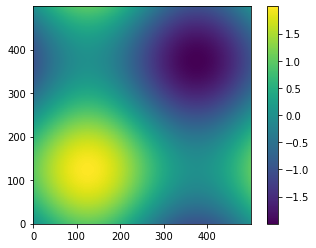

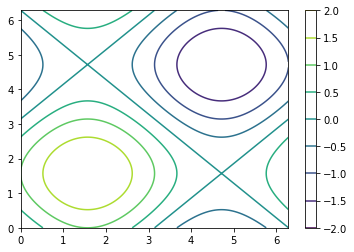

In [228]:
import matplotlib.pyplot as plt

def func(x):
    z=tf.math.sin(x[...,0])+tf.math.sin(x[...,1])
    return z

x=tf.linspace(0.,2*3.14,500)
y=tf.linspace(0.,2*3.14,500)
pointx,pointy=tf.meshgrid(x,y)
points=tf.stack([pointx,pointy],axis=2)
print('\n',points.shape)

z=func(points)
# print('\nz:',z)
# fig,ax=plt.subplots(122)
plt.imshow(z,origin='lower',interpolation='none')
plt.colorbar()
plt.figure()
plt.contour(pointx,pointy,z)
plt.colorbar()
plt.show()

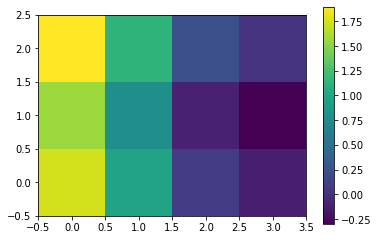

In [215]:
import matplotlib.pyplot as plt
z=func(points)
plt.imshow(z,origin='lower',interpolation='none')
plt.colorbar()
plt.show()

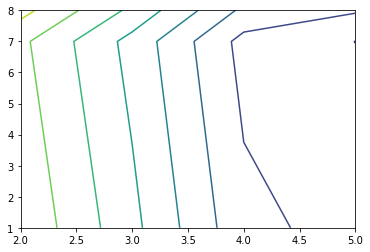

In [216]:
plt.contour(points_x,points_y,z)